In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_parquet('drw_data/train.parquet')
df.shape

(525887, 896)

In [7]:
df.head()

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.121263,-0.417690,0.005399,0.125948,0.058359,...,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167,0.362452


In [10]:
df.index = pd.to_datetime(df.index)
df['timestamp'] = df.index
df['timestamp'].min(), df['timestamp'].max()

(Timestamp('2023-03-01 00:00:00'), Timestamp('2024-02-29 23:59:00'))

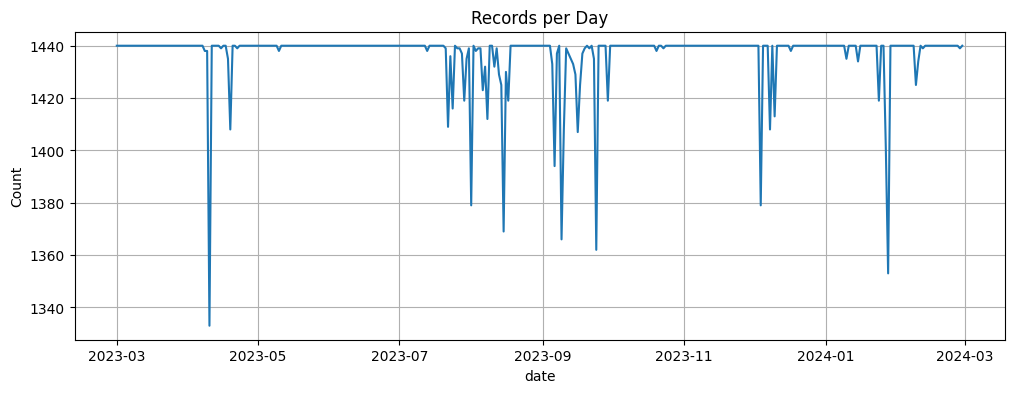

In [11]:
# 每天数据量
df['date'] = df.index.date
df['date'].value_counts().sort_index().plot(figsize=(12,4))
plt.title('Records per Day')
plt.ylabel('Count')
plt.grid(True)
plt.show()


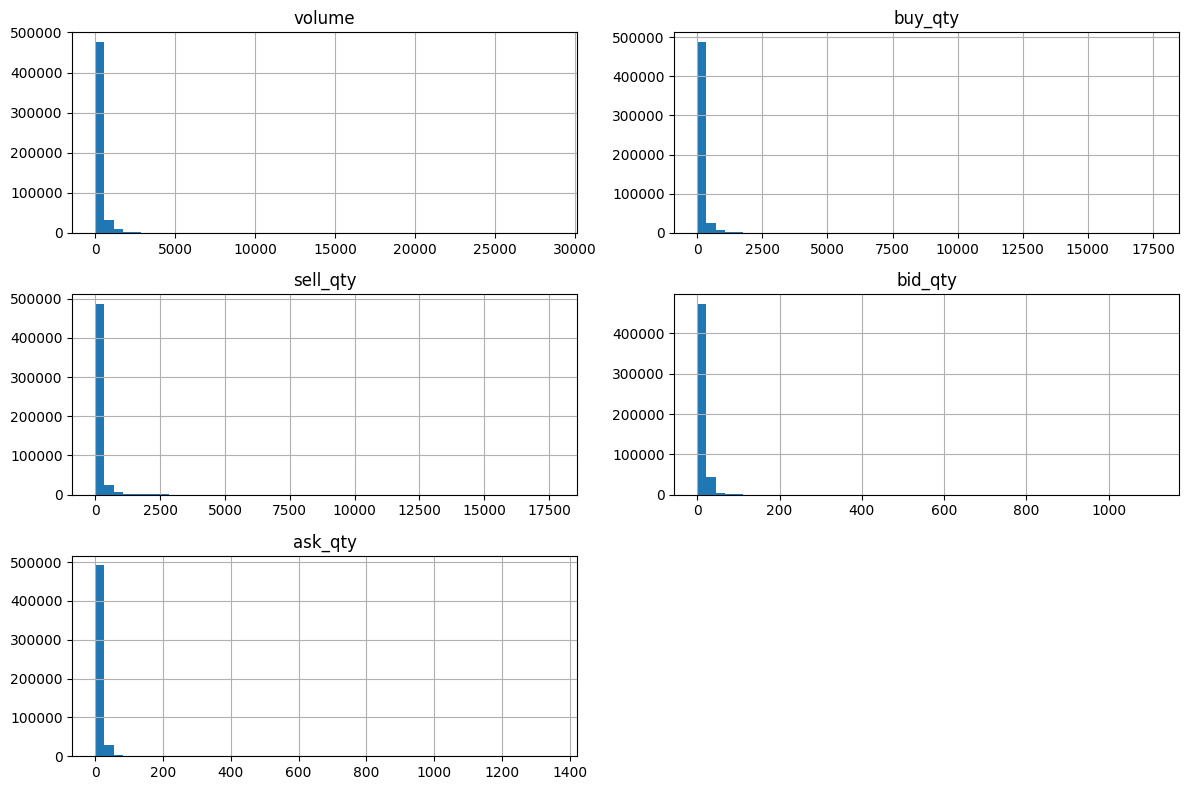

In [12]:
# 市场成交量与买卖量分布
cols = ['volume', 'buy_qty', 'sell_qty', 'bid_qty', 'ask_qty']
df[cols].hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()

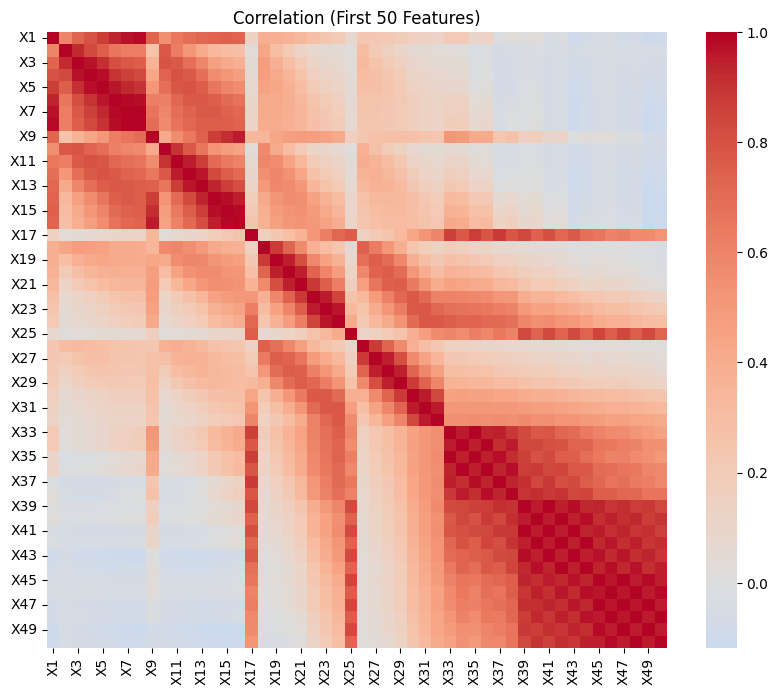

In [13]:
# 匿名特征相关性热图（前50列）
x_cols = [c for c in df.columns if c.startswith('X')][:50]
corr = df[x_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation (First 50 Features)')
plt.show()

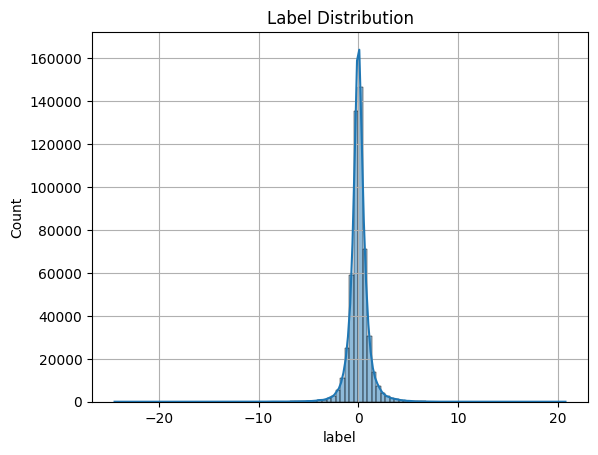

In [14]:
# label 分布
sns.histplot(df['label'], bins=100, kde=True)
plt.title('Label Distribution')
plt.xlabel('label')
plt.grid(True)
plt.show()
